## read the data

In [1]:
import numpy as np
import pandas as pd
housing=pd.read_csv("E:/ML/handson-ml/datasets/housing/housing.csv")

In [2]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
#housing.hist(bins=50,figsize=(20,15))
#plt.show()

In [4]:
import hashlib 

def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

def split_train_test_by_id(data,test_radio,id_column,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_radio,hash))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [5]:
housing_with_id=housing.reset_index()
train_set,test_set=split_train_test_by_id(housing_with_id,0.2,'index')

In [6]:
#train_set.hist(bins=50,figsize=(20,15))
#plt.show()

In [7]:
#test_set.hist(bins=50,figsize=(20,15))
#plt.show()

## create a test set and a train set

In [8]:
housing['income_cat']=np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat']<5,5.0,inplace=True)

In [9]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)#n_splits is the number of pairs of the train and test sets
for train_index,test_index in split.split(housing,housing['income_cat']):#split.split return a generator which only generate once
    strat_train_set=housing.loc[train_index]#train_index, test_index are two ndarray
    strat_test_set=housing.loc[test_index]

In [11]:
'''
for train_index,test_index in split.split(housing,housing['income_cat']):
    pass
print(type(train_index))
strat_train_set=housing.loc[train_index]
strat_test_set=housing.loc[test_index]
print(len(strat_train_set))
print(len(strat_test_set))
'''

"\nfor train_index,test_index in split.split(housing,housing['income_cat']):\n    pass\nprint(type(train_index))\nstrat_train_set=housing.loc[train_index]\nstrat_test_set=housing.loc[test_index]\nprint(len(strat_train_set))\nprint(len(strat_test_set))\n"

In [12]:
for set in (strat_train_set,strat_test_set):
#    print(type(set))
    set.drop(['income_cat'],axis=1,inplace=True)

In [13]:
#housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

In [14]:
'''
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
'''

'\nhousing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,\n    s=housing["population"]/100, label="population", figsize=(10,7),\n    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,\n    sharex=False)\nplt.legend()\n'

In [15]:
#housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [16]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Prepare the data for Machine Learning algorithms

In [17]:
#the predictors and the labels
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [18]:
from sklearn.preprocessing import Imputer

In [50]:
#test instance
a=np.array([[0,1,None],[1,2,3]])
imputer.fit(a)
b=imputer.transform(a)
print(a,'\n',b)

[[0 1 None]
 [1 2 3]] 
 [[0. 1. 3.]
 [1. 2. 3.]]


In [19]:
imputer=Imputer(strategy='median')
housing_num=housing.drop('ocean_proximity',axis=1)

In [20]:
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [1]:
from sklearn.preprocessing import LabelBinarizer
import sys
sys.path.append('../handson-ml')
from future_encoders import OrdinalEncoder

In [26]:
from future_encoders import OneHotEncoder

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
'''
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr
'''

'\nnum_pipeline = Pipeline([\n        (\'imputer\', Imputer(strategy="median")),\n        (\'attribs_adder\', CombinedAttributesAdder()),\n        (\'std_scaler\', StandardScaler()),\n    ])\n\nhousing_num_tr = num_pipeline.fit_transform(housing_num)\nhousing_num_tr\n'

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [30]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])



In [31]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## select and train a model

In [32]:
from sklearn.linear_model import LinearRegression
 
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)

print("Predictions:\t",lin_reg.predict(some_data_prepared))
print("Labels:\t\t",list(some_labels))

Predictions:	 [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [34]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.19819848923

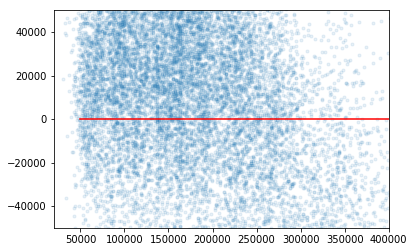

In [35]:
#original codes
plt.plot(housing_labels,housing_predictions-housing_labels,'.',alpha=0.1)
plt.plot([50000,400000],[0,0],'r-')
plt.axis([20000,400000,-50000,50000])
plt.show()

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_predictions,housing_labels)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [38]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores:',scores)
    print('Mean',scores.mean())
    print('Standard deviation:',scores.std())   

tree_scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores=np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [70094.16161601 66176.55416376 70836.67056736 68425.40823039
 71535.12971827 75359.94642501 70815.35954658 71162.94698638
 75351.69887348 70382.84655683]
Mean 71014.07226840632
Standard deviation: 2634.6478669652543


In [39]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean 69052.46136345083
Standard deviation: 2731.6740017983493


In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)
housing_predictions=forest_reg.predict(housing_prepared)

forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51676.54805775 50390.31689538 52957.67221096 54916.58533043
 51616.87452781 55446.22388341 51886.9000184  51102.58426955
 56049.66915113 53762.94225281]
Mean 52980.631659763094
Standard deviation: 1866.8716825139481


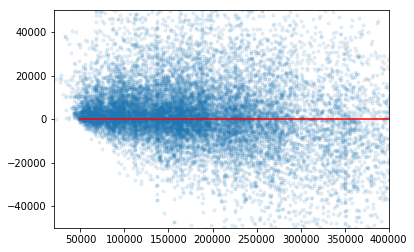

In [41]:
plt.plot(housing_labels,housing_predictions-housing_labels,'.',alpha=0.1)
plt.plot([50000,400000],[0,0],'r-')
plt.axis([20000,400000,-50000,50000])
plt.show()

In [42]:
#original work
#the model can be improved by adding weights to each column or adjusting the data value
from sklearn.neighbors import KNeighborsRegressor
kNeighbors_reg=KNeighborsRegressor(n_neighbors=4)
kNeighbors_reg.fit(housing_prepared,housing_labels)
housing_predictions=kNeighbors_reg.predict(housing_prepared)

kNeighbors_scores=cross_val_score(kNeighbors_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
kNeighbors_rmse_scores=np.sqrt(-kNeighbors_scores)
display_scores(kNeighbors_rmse_scores)

Scores: [62006.15223893 62483.93481943 63760.58271754 64505.50747261
 60408.30249295 64055.61796528 59772.86965417 61484.43196213
 64007.03688514 62515.41848166]
Mean 62499.9854689845
Standard deviation: 1529.3931701750817


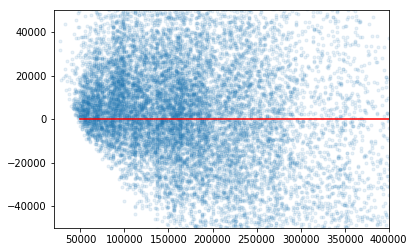

In [43]:
plt.plot(housing_labels,housing_predictions-housing_labels,'.',alpha=0.1)
plt.plot([50000,400000],[0,0],'r-')
plt.axis([20000,400000,-50000,50000])
plt.show()